In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM,SimpleRNN
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

In [42]:
df = pd.read_csv('/content/drive/MyDrive/My_Colab_Notebook/Soft Computing/Assignment-3/Dataset 2.csv' , engine='python')
df

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [43]:
###Drop Nan Values
df=df.dropna()
df

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [44]:
## Get the Independent Features
X=df.drop('polarity',axis=1)
X.head()


,text
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [45]:
## Get the Dependent features
y=df['polarity']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: polarity, dtype: int64

In [46]:
y.value_counts()

0    8000
1    2314
Name: polarity, dtype: int64

In [47]:
messages=X.copy()
messages

,text
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...
10309,No Depression by G Herbo is my mood from now o...
10310,What do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...
10312,dont mistake a bad day with depression! everyo...


In [48]:
messages.reset_index(inplace=True)
messages

,index,text
0,0,just had a real good moment. i missssssssss hi...
1,1,is reading manga http://plurk.com/p/mzp1e
2,2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,3,@lapcat Need to send 'em to my accountant tomo...
4,4,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...
10309,10309,No Depression by G Herbo is my mood from now o...
10310,10310,What do you do when depression succumbs the br...
10311,10311,Ketamine Nasal Spray Shows Promise Against Dep...
10312,10312,dont mistake a bad day with depression! everyo...


In [49]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)




Streaming output truncated to the last 5000 lines.
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503

In [51]:
corpus

['real good moment missssssssss much',
 'read manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtub com watch v zogfqvh',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund',
 'sleepi good time tonight though',
 'silkcharm nbn someon alreadi said fiber home mean least regular',
 'c possibl today nice',
 'nite twittervil workout ciao',
 'danann night darlin sweet dream',
 'good morn everybodi',
 'final creat wordpress blog alreadi blog seattl coffe commun http tinyurl com c uufd',
 'kisha cnt get u til get frm u rememb ur top',
 'nicolerichi ye rememb band awesom pleas repli',
 'realli love reflect shadow',
 'blueaero ooo fantasi like fantasi novel check',
 'rokchic prob sell noth blog http snedwan com get listen band itun',
 'shipovalov quot nokla connect peopl quot',
 'stay late start earli good thing like job',
 'kal penn read new job congratul fantast',
 'abl sleep think watch ugli betti onl

In [52]:
# vocabulary_size
voc_size=5000

One hot representation

In [53]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4122, 2105, 3222, 3461, 2498],
 [3510, 2685, 366, 2566, 4553, 4273, 4623, 4591],
 [938, 366, 2270, 4553, 634, 366, 3876, 2301, 4553, 2542, 2946, 3305],
 [3258, 3761, 2885, 2179, 3602, 3740, 4764, 3245, 547, 3691, 3946, 894, 4517],
 [1755, 595, 595, 4553, 1071],
 [2248, 2105, 1138, 4814, 4517],
 [172, 3275, 2974, 4110, 3906, 4987, 2958, 4116, 2046, 3526],
 [3550, 587, 479, 3037],
 [4899, 4659, 4493, 4181],
 [3102, 2525, 3185, 3786, 2842],
 [2105, 4112, 4713],
 [4727,
  3291,
  293,
  4838,
  4110,
  4838,
  1287,
  4134,
  2864,
  366,
  2988,
  4553,
  3550,
  2367],
 [4040, 1663, 2678, 3503, 2604, 2678, 4577, 3503, 590, 337, 2253],
 [4512, 3197, 590, 2955, 363, 677, 2305],
 [1787, 844, 3598, 2036],
 [2650, 3180, 121, 4430, 121, 597, 4372],
 [555, 2967, 576, 3065, 4838, 366, 2635, 4553, 2678, 3436, 2955, 4728],
 [915, 1033, 2969, 4040, 1126, 1033],
 [3796, 4256, 1764, 11, 2105, 2637, 4430, 2532],
 [3065, 1479, 3510, 3088, 2532, 700, 4892],
 [891, 1692, 2874, 2542, 496, 1931, 1661],
 

**Embedding Representation**

In [54]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3222 3461 2498]
 [   0    0    0 ... 4273 4623 4591]
 [   0    0    0 ... 2542 2946 3305]
 ...
 [   0    0    0 ...  366  886 4096]
 [   0    0    0 ...  755 3799 2179]
 [   0    0    0 ...    0    0    0]]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 20, 512)           152064    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 20, 1024)          1049600   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 20, 128)           139392    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 20, 1)             129       
Total params: 1,541,185
Trainable params: 1,541,185
Non-trainable params: 0
____________________________________________

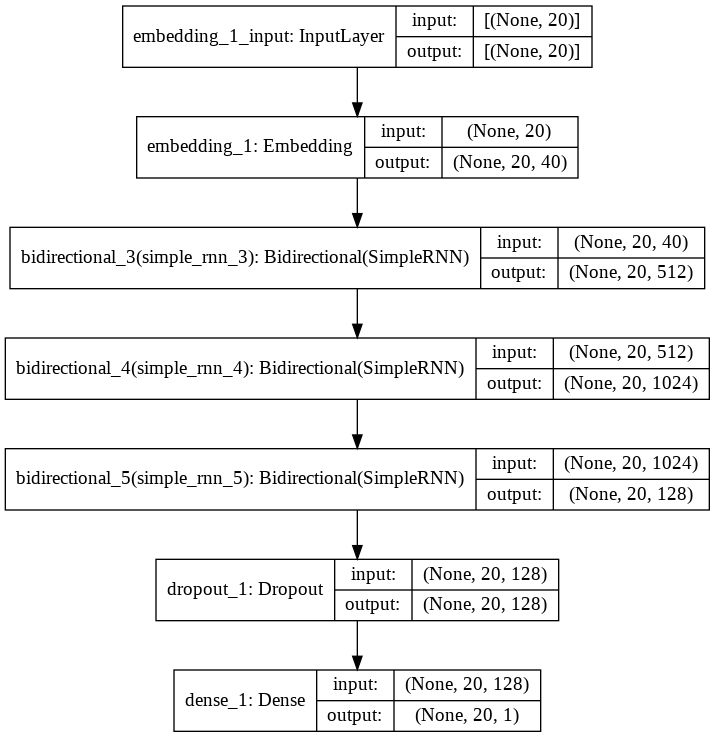

In [55]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(SimpleRNN(256, return_sequences = True, dropout = 0.2)))
model1.add(Bidirectional(SimpleRNN(512, return_sequences = True, dropout = 0.2)))
model1.add(Bidirectional(SimpleRNN(64, return_sequences = True, dropout = 0.2)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())
plot_model(model1, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [56]:
len(embedded_docs),y.shape

(10314, (10314,))

In [57]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape


((10314, 20), (10314,))

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [59]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 [==============================] - 56s 464ms/step - loss: 0.4441 - accuracy: 0.8353 - val_loss: 0.1847 - val_accuracy: 0.9280
Epoch 2/10
108/108 [==============================] - 50s 460ms/step - loss: 0.1164 - accuracy: 0.9617 - val_loss: 0.1397 - val_accuracy: 0.9593
Epoch 3/10
108/108 [==============================] - 51s 472ms/step - loss: 0.2025 - accuracy: 0.9280 - val_loss: 0.1322 - val_accuracy: 0.9633
Epoch 4/10
108/108 [==============================] - 51s 470ms/step - loss: 0.1011 - accuracy: 0.9662 - val_loss: 0.1451 - val_accuracy: 0.9639
Epoch 5/10
108/108 [==============================] - 50s 463ms/step - loss: 0.0392 - accuracy: 0.9903 - val_loss: 0.1159 - val_accuracy: 0.9708
Epoch 6/10
108/108 [==============================] - 50s 466ms/step - loss: 0.0484 - accuracy: 0.9863 - val_loss: 0.1335 - val_accuracy: 0.9659
Epoch 7/10
108/108 [==============================] - 50s 463ms/step - loss: 0.0252 - accuracy: 0.9953 - val_loss: 0.1133 - val_ac

## Performance Matrix and Accuracy

In [64]:
y_pred1 = model1.predict(X_test)
y_pred1= np.round(y_pred1).astype(int)
y_pred1


array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])

In [61]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
len(y_test)

3404

In [65]:
from sklearn.metrics import confusion_matrix

y_pred1=y_pred1.reshape(-1)
confusion_matrix(y_test,y_pred1)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))